In [105]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as geom



In [106]:
# Create a DataFrame with box names and values
box_names = [chr(65 + i) for i in range(16)]
values = list(range(0, 16))
values_1 = [1,2,3,4,8,7,6,5,9,10,11,12,16,15,14,13]
values_2 = list(range(1, 17))
df = pd.DataFrame({'FIPS': box_names, 'Value': values,'Value_1': values_1,'Value_2': values_2})

In [107]:
df

,FIPS,Value,Value_1,Value_2
0,A,0,1,1
1,B,1,2,2
2,C,2,3,3
3,D,3,4,4
4,E,4,8,5
5,F,5,7,6
6,G,6,6,7
7,H,7,5,8
8,I,8,9,9
9,J,9,10,10


In [108]:
# Sorting the DataFrame based on the 'rate' column
df.sort_values(by='Value_2', inplace=True)

In [109]:
# Adding a new column 'new_ID' with ID values starting from zero
df['sortedID'] = range(len(df))

In [110]:
df = df[['FIPS','Value', 'sortedID', 'Value_2']]

In [111]:
# Function to calculate square coordinates for a given name
def calculate_square_coordinates(row):
    box_name = row['FIPS']
    value = row['Value']
    # Assuming each smaller square has a side length of 1 unit
    x = value % 4
    y = value // 4
    # Return square coordinates as a Shapely polygon
    return geom.Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])

In [112]:
# Calculate square coordinates for each row and create a geometry column
df['geometry'] = df.apply(calculate_square_coordinates, axis=1)

In [113]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [114]:
# Set the CRS to a simple Cartesian coordinate system
gdf.crs = "EPSG:3395"  # This is a commonly used projected CRS

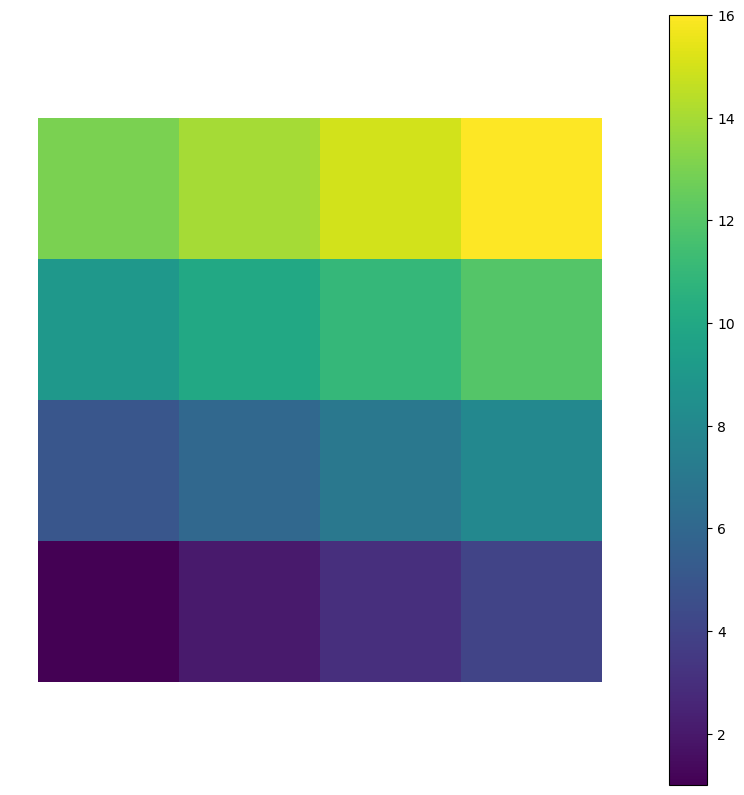

In [158]:
# plot the geodataframe

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='Value_2', cmap='viridis', legend=True)
plt.axis('off')
plt.show()

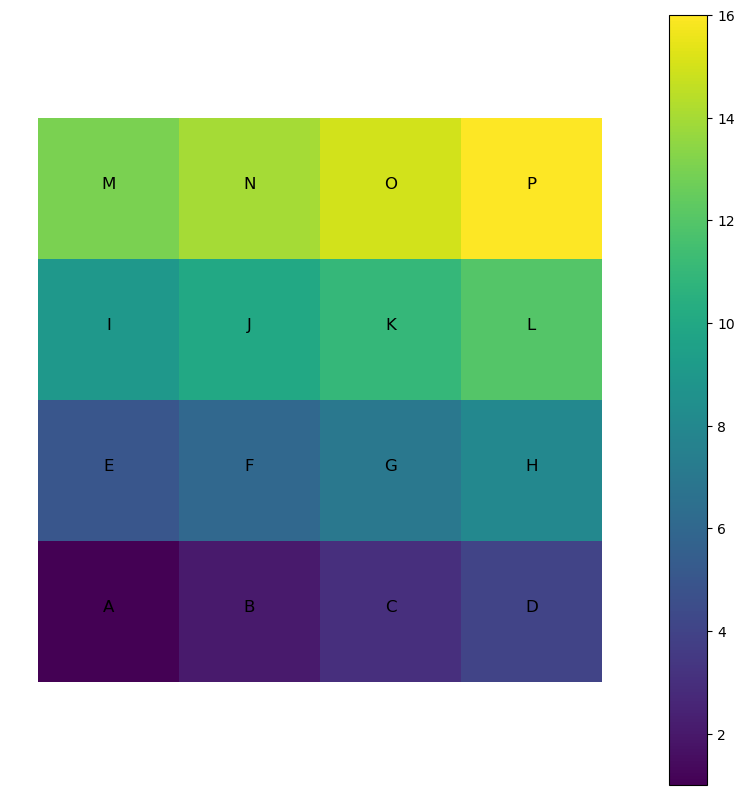

In [116]:
# plot the geodataframe and FIPS on the center of each square

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='Value_2', cmap='viridis', legend=True)
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['FIPS']):
    ax.text(x, y, label, fontsize=12, ha='center')

plt.axis('off')
plt.show()

In [117]:
gdf.head()

,FIPS,Value,sortedID,Value_2,geometry
0,A,0,0,1,"POLYGON ((0.000 0.000, 1.000 0.000, 1.000 1.00..."
1,B,1,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00..."
2,C,2,2,3,"POLYGON ((2.000 0.000, 3.000 0.000, 3.000 1.00..."
3,D,3,3,4,"POLYGON ((3.000 0.000, 4.000 0.000, 4.000 1.00..."
4,E,4,4,5,"POLYGON ((0.000 1.000, 1.000 1.000, 1.000 2.00..."


In [118]:
# add a new two coumn with the centroid of the square
gdf['centroid'] = gdf['geometry'].centroid

In [119]:
gdf.head()

,FIPS,Value,sortedID,Value_2,geometry,centroid
0,A,0,0,1,"POLYGON ((0.000 0.000, 1.000 0.000, 1.000 1.00...",POINT (0.500 0.500)
1,B,1,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500)
2,C,2,2,3,"POLYGON ((2.000 0.000, 3.000 0.000, 3.000 1.00...",POINT (2.500 0.500)
3,D,3,3,4,"POLYGON ((3.000 0.000, 4.000 0.000, 4.000 1.00...",POINT (3.500 0.500)
4,E,4,4,5,"POLYGON ((0.000 1.000, 1.000 1.000, 1.000 2.00...",POINT (0.500 1.500)


In [120]:
# add two new columns with the x and y coordinates of the centroid
gdf['x'] = gdf['centroid'].x
gdf['y'] = gdf['centroid'].y


In [121]:
gdf.head()

,FIPS,Value,sortedID,Value_2,geometry,centroid,x,y
0,A,0,0,1,"POLYGON ((0.000 0.000, 1.000 0.000, 1.000 1.00...",POINT (0.500 0.500),0.5,0.5
1,B,1,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500),1.5,0.5
2,C,2,2,3,"POLYGON ((2.000 0.000, 3.000 0.000, 3.000 1.00...",POINT (2.500 0.500),2.5,0.5
3,D,3,3,4,"POLYGON ((3.000 0.000, 4.000 0.000, 4.000 1.00...",POINT (3.500 0.500),3.5,0.5
4,E,4,4,5,"POLYGON ((0.000 1.000, 1.000 1.000, 1.000 2.00...",POINT (0.500 1.500),0.5,1.5


In [122]:
selected_fips = 'O'

In [123]:
x_g = gdf.loc[gdf['FIPS'] == selected_fips, 'x'].values[0]
y_g = gdf.loc[gdf['FIPS'] == selected_fips, 'y'].values[0]

In [124]:
x_g

2.5

In [125]:
y_g

3.5

In [126]:

for index, row in gdf.iterrows():
        x = row['x']
        y = row['y']
        
        distance = np.sqrt((x-x_g)**2 + (y-y_g)**2)

        print("Distance to G:", distance)

        gdf.loc[index, 'distance'] = distance

Distance to G: 3.605551275463989
Distance to G: 3.1622776601683795
Distance to G: 3.0
Distance to G: 3.1622776601683795
Distance to G: 2.8284271247461903
Distance to G: 2.23606797749979
Distance to G: 2.0
Distance to G: 2.23606797749979
Distance to G: 2.23606797749979
Distance to G: 1.4142135623730951
Distance to G: 1.0
Distance to G: 1.4142135623730951
Distance to G: 2.0
Distance to G: 1.0
Distance to G: 0.0
Distance to G: 1.0


In [127]:
gdf.head()

,FIPS,Value,sortedID,Value_2,geometry,centroid,x,y,distance
0,A,0,0,1,"POLYGON ((0.000 0.000, 1.000 0.000, 1.000 1.00...",POINT (0.500 0.500),0.5,0.5,3.605551
1,B,1,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500),1.5,0.5,3.162278
2,C,2,2,3,"POLYGON ((2.000 0.000, 3.000 0.000, 3.000 1.00...",POINT (2.500 0.500),2.5,0.5,3.000000
3,D,3,3,4,"POLYGON ((3.000 0.000, 4.000 0.000, 4.000 1.00...",POINT (3.500 0.500),3.5,0.5,3.162278
4,E,4,4,5,"POLYGON ((0.000 1.000, 1.000 1.000, 1.000 2.00...",POINT (0.500 1.500),0.5,1.5,2.828427


In [128]:
# sort by distance
gdf.sort_values(by='distance', inplace=True)

gdf.head()

,FIPS,Value,sortedID,Value_2,geometry,centroid,x,y,distance
14,O,14,14,15,"POLYGON ((2.000 3.000, 3.000 3.000, 3.000 4.00...",POINT (2.500 3.500),2.5,3.5,0.000000
10,K,10,10,11,"POLYGON ((2.000 2.000, 3.000 2.000, 3.000 3.00...",POINT (2.500 2.500),2.5,2.5,1.000000
13,N,13,13,14,"POLYGON ((1.000 3.000, 2.000 3.000, 2.000 4.00...",POINT (1.500 3.500),1.5,3.5,1.000000
15,P,15,15,16,"POLYGON ((3.000 3.000, 4.000 3.000, 4.000 4.00...",POINT (3.500 3.500),3.5,3.5,1.000000
9,J,9,9,10,"POLYGON ((1.000 2.000, 2.000 2.000, 2.000 3.00...",POINT (1.500 2.500),1.5,2.5,1.414214


In [129]:
gdf['rank_distance'] = range(len(df))

In [130]:
gdf.head()

,FIPS,Value,sortedID,Value_2,geometry,centroid,x,y,distance,rank_distance
14,O,14,14,15,"POLYGON ((2.000 3.000, 3.000 3.000, 3.000 4.00...",POINT (2.500 3.500),2.5,3.5,0.000000,0
10,K,10,10,11,"POLYGON ((2.000 2.000, 3.000 2.000, 3.000 3.00...",POINT (2.500 2.500),2.5,2.5,1.000000,1
13,N,13,13,14,"POLYGON ((1.000 3.000, 2.000 3.000, 2.000 4.00...",POINT (1.500 3.500),1.5,3.5,1.000000,2
15,P,15,15,16,"POLYGON ((3.000 3.000, 4.000 3.000, 4.000 4.00...",POINT (3.500 3.500),3.5,3.5,1.000000,3
9,J,9,9,10,"POLYGON ((1.000 2.000, 2.000 2.000, 2.000 3.00...",POINT (1.500 2.500),1.5,2.5,1.414214,4


In [131]:
val = gdf.loc[gdf['FIPS'] == selected_fips, 'Value_2'].values[0]

In [132]:
val

15

In [133]:
for index, row in gdf.iterrows():
        value = row['Value_2']
        
        diff = value - val

        print("Difference to G:", diff)

        gdf.loc[index, 'diff_val_2'] = diff

Difference to G: 0
Difference to G: -4
Difference to G: -1
Difference to G: 1
Difference to G: -5
Difference to G: -3
Difference to G: -8
Difference to G: -2
Difference to G: -9
Difference to G: -7
Difference to G: -6
Difference to G: -10
Difference to G: -12
Difference to G: -13
Difference to G: -11
Difference to G: -14


In [134]:
# sort by diff_val_2
gdf.sort_values(by='diff_val_2', inplace=True)

In [135]:
gdf.head()

,FIPS,Value,sortedID,Value_2,geometry,centroid,x,y,distance,rank_distance,diff_val_2
0,A,0,0,1,"POLYGON ((0.000 0.000, 1.000 0.000, 1.000 1.00...",POINT (0.500 0.500),0.5,0.5,3.605551,15,-14.0
1,B,1,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500),1.5,0.5,3.162278,13,-13.0
2,C,2,2,3,"POLYGON ((2.000 0.000, 3.000 0.000, 3.000 1.00...",POINT (2.500 0.500),2.5,0.5,3.000000,12,-12.0
3,D,3,3,4,"POLYGON ((3.000 0.000, 4.000 0.000, 4.000 1.00...",POINT (3.500 0.500),3.5,0.5,3.162278,14,-11.0
4,E,4,4,5,"POLYGON ((0.000 1.000, 1.000 1.000, 1.000 2.00...",POINT (0.500 1.500),0.5,1.5,2.828427,11,-10.0


In [136]:
# drop sortedID
gdf.drop(columns=['sortedID'], inplace=True)

In [137]:
gdf['rank_var_diff'] = range(len(df))

In [138]:
gdf.head()

,FIPS,Value,Value_2,geometry,centroid,x,y,distance,rank_distance,diff_val_2,rank_var_diff
0,A,0,1,"POLYGON ((0.000 0.000, 1.000 0.000, 1.000 1.00...",POINT (0.500 0.500),0.5,0.5,3.605551,15,-14.0,0
1,B,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500),1.5,0.5,3.162278,13,-13.0,1
2,C,2,3,"POLYGON ((2.000 0.000, 3.000 0.000, 3.000 1.00...",POINT (2.500 0.500),2.5,0.5,3.000000,12,-12.0,2
3,D,3,4,"POLYGON ((3.000 0.000, 4.000 0.000, 4.000 1.00...",POINT (3.500 0.500),3.5,0.5,3.162278,14,-11.0,3
4,E,4,5,"POLYGON ((0.000 1.000, 1.000 1.000, 1.000 2.00...",POINT (0.500 1.500),0.5,1.5,2.828427,11,-10.0,4


In [139]:
gdf['mean_rank'] = (gdf['rank_distance'] + gdf['rank_var_diff']) / 2

# sort by mean_rank
gdf.sort_values(by='mean_rank', inplace=True)

In [140]:
gdf.head()

,FIPS,Value,Value_2,geometry,centroid,x,y,distance,rank_distance,diff_val_2,rank_var_diff,mean_rank
10,K,10,11,"POLYGON ((2.000 2.000, 3.000 2.000, 3.000 3.00...",POINT (2.500 2.500),2.5,2.5,1.000000,1,-4.0,10,5.5
6,G,6,7,"POLYGON ((2.000 1.000, 3.000 1.000, 3.000 2.00...",POINT (2.500 1.500),2.5,1.5,2.000000,6,-8.0,6,6.0
5,F,5,6,"POLYGON ((1.000 1.000, 2.000 1.000, 2.000 2.00...",POINT (1.500 1.500),1.5,1.5,2.236068,8,-9.0,5,6.5
9,J,9,10,"POLYGON ((1.000 2.000, 2.000 2.000, 2.000 3.00...",POINT (1.500 2.500),1.5,2.5,1.414214,4,-5.0,9,6.5
1,B,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500),1.5,0.5,3.162278,13,-13.0,1,7.0


In [141]:
gdf['sortedID'] = range(len(df))

In [142]:
gdf.head()

,FIPS,Value,Value_2,geometry,centroid,x,y,distance,rank_distance,diff_val_2,rank_var_diff,mean_rank,sortedID
10,K,10,11,"POLYGON ((2.000 2.000, 3.000 2.000, 3.000 3.00...",POINT (2.500 2.500),2.5,2.5,1.000000,1,-4.0,10,5.5,0
6,G,6,7,"POLYGON ((2.000 1.000, 3.000 1.000, 3.000 2.00...",POINT (2.500 1.500),2.5,1.5,2.000000,6,-8.0,6,6.0,1
5,F,5,6,"POLYGON ((1.000 1.000, 2.000 1.000, 2.000 2.00...",POINT (1.500 1.500),1.5,1.5,2.236068,8,-9.0,5,6.5,2
9,J,9,10,"POLYGON ((1.000 2.000, 2.000 2.000, 2.000 3.00...",POINT (1.500 2.500),1.5,2.5,1.414214,4,-5.0,9,6.5,3
1,B,1,2,"POLYGON ((1.000 0.000, 2.000 0.000, 2.000 1.00...",POINT (1.500 0.500),1.5,0.5,3.162278,13,-13.0,1,7.0,4


In [143]:
import invr
import io
from PIL import Image


In [144]:
def generate_adjacent_counties(dataframe, variable_name):
    """Generate adjacent counties based on given dataframe and variable."""
    filtered_df = dataframe
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()
    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)
    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()
    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county', right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')
    return adjacencies_list, merged_df, county_list

In [145]:
def form_simplicial_complex(adjacent_county_list, county_list):
    """Form a simplicial complex based on adjacent counties."""
    max_dimension = 3
    V = invr.incremental_vr([], adjacent_county_list, max_dimension, county_list)
    return V

In [146]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [147]:
def plot_simplicial_complex(dataframe, simplices,variable, list_gif=[]):
    # Extract city centroids
    city_coordinates = {row['sortedID']: np.array((row['geometry'].centroid.x, row['geometry'].centroid.y)) for _, row in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axis_off() 

    # Plot the "dataframe" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # # Plot the centroid of the large square with values
    for _, row in dataframe.iterrows():
        centroid = row['geometry'].centroid
        # text_to_display = f"{row[variable]:.3f}"
        text_to_display = f"{row[variable]:.3f}"
        plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    # Plot edges and triangles from simplices
    for edge_or_triangle in simplices:
        if len(edge_or_triangle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_triangle]), color='red', linewidth=2)
            img = fig2img(fig)
            list_gif.append(img)
        elif len(edge_or_triangle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_triangle], color='green', alpha=0.2))
            img = fig2img(fig)
            list_gif.append(img)

        #can change above code block
        plt.close(fig)

    return list_gif

In [148]:
list_gif = []

df_one_variable = gpd.GeoDataFrame(gdf, geometry='geometry')
df_one_variable.crs = "EPSG:3395"


adjacencies_list, adjacent_counties_df, county_list = generate_adjacent_counties(df_one_variable, 'test')
adjacent_counties_dict = dict(zip(adjacent_counties_df['county'], adjacent_counties_df['adjacent']))
county_list = adjacent_counties_df['county'].tolist()
simplices = form_simplicial_complex(adjacent_counties_dict, county_list)

list_gif = plot_simplicial_complex(df_one_variable, simplices, 'Value_2',list_gif)

In [149]:
list_gif[0].save('test.gif',save_all=True,append_images=list_gif[1:],optimize=False,duration=200,loop=0) #png also works

In [150]:
import gudhi

In [151]:
variable_name = 'mean_rank'

In [152]:
st = gudhi.SimplexTree()
st.set_dimension(2)

for simplex in simplices:
    if len(simplex) == 1:
        st.insert([simplex[0]], filtration=0.0)

for simplex in simplices:
    if len(simplex) == 2:
        last_simplex = simplex[-1]
        filtration_value = df_one_variable.loc[df_one_variable['sortedID'] == last_simplex, variable_name].values[0]
        st.insert(simplex, filtration=filtration_value)

for simplex in simplices:
    if len(simplex) == 3:
        last_simplex = simplex[-1]
        filtration_value = df_one_variable.loc[df_one_variable['sortedID'] == last_simplex, variable_name].values[0]
        st.insert(simplex, filtration=filtration_value)

st.compute_persistence()
persistence = st.persistence()

intervals_dim1 = st.persistence_intervals_in_dimension(1)
intervals_dim0 = st.persistence_intervals_in_dimension(0)


In [153]:
intervals_dim1

array([], shape=(0, 2), dtype=float64)

In [154]:
intervals_dim0

array([[0. , 6. ],
       [0. , 6.5],
       [0. , 6.5],
       [0. , 7. ],
       [0. , 7. ],
       [0. , 7. ],
       [0. , 7.5],
       [0. , 7.5],
       [0. , 7.5],
       [0. , 8. ],
       [0. , 8. ],
       [0. , 8.5],
       [0. , 9. ],
       [0. , 9. ],
       [0. , 9.5],
       [0. , inf]])

In [155]:
# drop the last value dim 0
intervals_dim0 = intervals_dim0[:-1]

In [156]:
# sum dim 0
sum_dim0 = 0
for interval in intervals_dim0:
    sum_dim0 += interval[1] - interval[0]

sum_dim0

114.5